In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import plotly.express as px
from heapq import nlargest
from operator import itemgetter
from sklearn.model_selection import train_test_split
def grad_a(Ui, Yij, Vj, reg, eta, ai, bj, mu):
  grad = eta*(reg*ai-(Yij-np.dot(Ui,Vj)-ai-bj-mu))
  return grad

def grad_b(Ui, Yij, Vj, reg, eta, ai, bj, mu):
  grad = eta*(reg*bj-(Yij-np.dot(Ui,Vj)-ai-bj-mu))
  return grad

def grad_U(Ui, Yij, Vj, reg, eta, ai, bj, mu):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    grad = eta*(reg*Ui + (-1*Vj)*(Yij-np.dot(Ui,Vj)-ai-bj-mu))
    return grad

def grad_V(Vj, Yij, Ui, reg, eta, ai, bj, mu):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    grad = eta*(reg*Vj + (-1*Ui)*(Yij-np.dot(Ui,Vj)-ai-bj-mu))
    return grad

def get_err(U, V, Y, a, b, mu, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0
    for item in Y:
      err += 1/2*(item[2]-np.dot(np.transpose(U[item[0]-1]),V[item[1]-1])- a - b- mu)**2 + 1/2*(reg)*(a**2+b**2+mu**2+np.linalg.norm(U[item[0]-1])**2+np.linalg.norm(V[item[1]-1])**2)
    return err/(len(Y))


def train_model(M, N, K, eta, reg, Y, eps=0.001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-.5,.5,size=[M, K])
    V = np.random.uniform(-.5,.5,size=[N, K])
    length = len(Y)
    mu = 0
    a=mu
    b=mu
    err = get_err(U, V, Y, a, b, mu, reg)
    past_err = err
    for m in range(max_epochs):
      for x in np.random.permutation(Y):
        i = x[0] - 1
        j = x[1] - 1

        a -= grad_a(U[i], x[2], V[j], reg, eta, a, b, mu)
        b -= grad_b(U[i], x[2], V[j], reg, eta, a, b, mu)

        U[i] -= grad_U(U[i], x[2], V[j], reg, eta, a, b, mu)
        V[j] -= grad_V(V[j], x[2], U[i], reg, eta, a, b, mu)
      err = get_err(U, V, Y, a, b, mu, reg=reg)
      current_tup = (U, V, err, a, b, mu)

      if (-1*current_tup[2] + past_err < eps):
        break
      else:
        past_err = current_tup[2]
    return current_tup


In [ ]:
# download the dataset
!wget -O data.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
!wget -O movies.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv

--2023-03-02 01:52:19--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596528 (1.5M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.52M  --.-KB/s    in 0.07s   

2023-03-02 01:52:20 (22.9 MB/s) - ‘data.csv’ saved [1596528/1596528]

--2023-03-02 01:52:20--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
user_data = {'User ID': [], 'Movie ID': [], 'Rating': []}
movie_data = {}

with open('movies.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  fieldnames = next(reader)
  for field in fieldnames:
    movie_data[field] = []
  for row in reader:
    for i in range(len(fieldnames)):
      field = fieldnames[i]
      spec_row = row[i]
      movie_data[field].append(spec_row)
print(movie_data['Movie Title'])

with open('data.csv') as csvfile:
  fieldnames = ['User ID', 'Movie ID', 'Rating']
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    user_data['User ID'].append(row[0])
    user_data['Movie ID'].append(row[1])
    user_data['Rating'].append(row[2])




['(500) Days of Summer (2009)', '10 Cloverfield Lane (2016)', '10,000 BC (2008)', '12 Years a Slave (2013)', '127 Hours (2010)', '13 Going on 30 (2004)', '1408 (2007)', '15 Minutes (2001)', '16 Blocks (2006)', '17 Again (2009)', '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)', '2012 (2009)', '2046 (2004)', '21 (2008)', '21 Grams (2003)', '21 Jump Street (2012)', '22 Jump Street (2014)', '24 Hour Party People (2002)', '25th Hour (2002)', '27 Dresses (2008)', '28 Days Later (2002)', '28 Weeks Later (2007)', '3 Idiots (2009)', '3-Iron (Bin-jip) (2004)', '30 Days of Night (2007)', '300 (2007)', '3000 Miles to Graceland (2001)', '300: Rise of an Empire (2014)', '3:10 to Yuma (2007)', '40 Days and 40 Nights (2002)', '40-Year-Old Virgin, The (2005)', '50 First Dates (2004)', '50/50 (2011)', '8 Mile (2002)', '9 (2009)', 'A Million Ways to Die in the West (2014)', 'A-Team, The (2010)', 'A.I. Artificial Intelligence (2001)', 'AVP: Alien vs. Predator (2004)', 'AVPR: Aliens vs. Predator - 

<ipython-input-1-34ec88b6899d>:37: RuntimeWarning: overflow encountered in multiply
  grad = eta*(reg*Vj + (-1*Ui)*(Yij-np.dot(Ui,Vj)-ai-bj-mu))
<ipython-input-1-34ec88b6899d>:25: RuntimeWarning: overflow encountered in multiply
  grad = eta*(reg*Ui + (-1*Vj)*(Yij-np.dot(Ui,Vj)-ai-bj-mu))
<ipython-input-1-34ec88b6899d>:37: RuntimeWarning: invalid value encountered in multiply
  grad = eta*(reg*Vj + (-1*Ui)*(Yij-np.dot(Ui,Vj)-ai-bj-mu))
<ipython-input-1-34ec88b6899d>:25: RuntimeWarning: invalid value encountered in multiply
  grad = eta*(reg*Ui + (-1*Vj)*(Yij-np.dot(Ui,Vj)-ai-bj-mu))


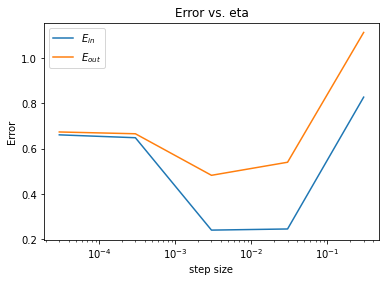

In [ ]:
from os import terminal_size
Y = []
for i in range(len(user_data['User ID'])):
  Y.append([float(user_data['User ID'][i]), float(user_data['Movie ID'][i]), float(user_data['Rating'][i])])
Y_train, Y_test = train_test_split(Y, shuffle=True, test_size=.1, random_state=0)


Y_train = np.array(Y_train).astype(int)
Y_test = np.array(Y_test).astype(int)


M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


reg = 0.0
etas = [.00003, .0003, .003, .03, .3, 3]
E_in = []
E_out = []
K=20



# Use to compute Ein and Eout
for eta in etas:
    U,V, err, a, b, mu = train_model(M, N, K, eta, reg, Y_train, max_epochs=50)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test, a, b, mu))

plt.plot(etas, E_in, label='$E_{in}$')
plt.plot(etas, E_out, label='$E_{out}$')
plt.title('Error vs. eta')
plt.xlabel('step size')
plt.xscale('log')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

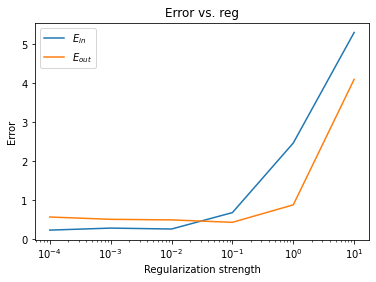

In [ ]:
from os import terminal_size
Y = []
for i in range(len(user_data['User ID'])):
  Y.append([float(user_data['User ID'][i]), float(user_data['Movie ID'][i]), float(user_data['Rating'][i])])
Y_train, Y_test = train_test_split(Y, shuffle=True, test_size=.1, random_state=0)


Y_train = np.array(Y_train).astype(int)
Y_test = np.array(Y_test).astype(int)


M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


regs = [.0001, .001, .01, .1, 1, 10]
eta = 3*10**(-2)
E_in = []
E_out = []
K=20



# Use to compute Ein and Eout
for reg in regs:
    U,V, err, a, b, mu = train_model(M, N, K, eta, reg, Y_train, max_epochs=50)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test, a, b, mu))

plt.plot(regs, E_in, label='$E_{in}$')
plt.plot(regs, E_out, label='$E_{out}$')
plt.title('Error vs. reg')
plt.xlabel('Regularization strength')
plt.xscale('log')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

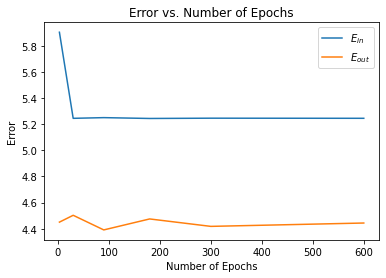

In [ ]:
from os import terminal_size
Y = []
for i in range(len(user_data['User ID'])):
  Y.append([float(user_data['User ID'][i]), float(user_data['Movie ID'][i]), float(user_data['Rating'][i])])
Y_train, Y_test = train_test_split(Y, shuffle=True, test_size=.2, random_state=0)


Y_train = np.array(Y_train).astype(int)
Y_test = np.array(Y_test).astype(int)


M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


regs = .1
eta = 3*10**(-3.5)
E_in = []
E_out = []
epochs = [3, 30, 90, 180, 300, 600]
K=20



# Use to compute Ein and Eout
for epoch in epochs:
    U,V, err, a, b, mu = train_model(M, N, K, eta, reg, Y_train, max_epochs=epoch)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test, a, b, mu))

plt.plot(epochs, E_in, label='$E_{in}$')
plt.plot(epochs, E_out, label='$E_{out}$')
plt.title('Error vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

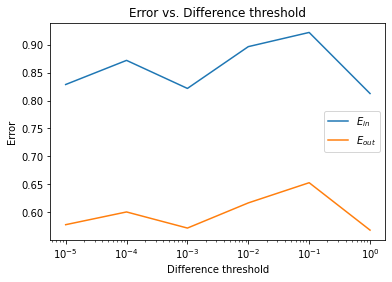

In [ ]:
from os import terminal_size
Y = []
for i in range(len(user_data['User ID'])):
  Y.append([float(user_data['User ID'][i]), float(user_data['Movie ID'][i]), float(user_data['Rating'][i])])
Y_train, Y_test = train_test_split(Y, shuffle=True, test_size=.2, random_state=0)


Y_train = np.array(Y_train).astype(int)
Y_test = np.array(Y_test).astype(int)


M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


reg = .1
eta = 3*10**(-3.5)
eps_s = [.00001, 0.0001, .001, .01, .1, 1]
E_in = []
E_out = []
epoch = 50
K=20



# Use to compute Ein and Eout
for eps in eps_s:
    U,V, err, a, b, mu = train_model(M, N, K, eta, reg, Y_train, max_epochs=epoch)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test, a, b, mu))

plt.plot(eps_s, E_in, label='$E_{in}$')
plt.plot(eps_s, E_out, label='$E_{out}$')
plt.title('Error vs. Difference threshold')
plt.xscale('log')
plt.xlabel('Difference threshold')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

In [ ]:
from os import terminal_size
Y = []
for i in range(len(user_data['User ID'])):
  Y.append([float(user_data['User ID'][i]), float(user_data['Movie ID'][i]), float(user_data['Rating'][i])])
Y_train, Y_test = train_test_split(Y, shuffle=True, test_size=.1, random_state=0)


Y_train = np.array(Y_train).astype(int)
Y_test = np.array(Y_test).astype(int)


M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies


reg = .1
eta = 3*10**(-2)
eps = .001
E_in = []
E_out = []
epoch = 50
K=20

# generated model
U,V, err, a,b,mu = train_model(M, N, K, eta, reg, Y_train, eps=eps ,max_epochs=50)


In [ ]:
print('Eout')
# get_err(U, V, Y, a, b, mu, reg=0.0):
print(get_err(U, V, Y_test, a, b, mu, reg=0.1))


Eout
0.7471575175356385


In [ ]:
# SVD OF V
# 1499
# 20
# M, N, K, eta, reg, Y, eps=0.001, max_epochs=300
U = np.transpose(U)
V = np.transpose(V)

A, B, err = np.linalg.svd(V)

In [ ]:
# Projections
print(A[:, [0,1]].shape)
V_app = np.matmul(np.transpose(A[:, [0,1]]), V)
U_app = np.matmul(np.transpose((A)[:, [0,1]]), (U))



(20, 2)


{'804': 747, '806': 713, '805': 698, '1173': 610, '1015': 585, '310': 561, '445': 528, '728': 520, '897': 519, '954': 517}
[1.2331714413627661, 0.8168102009476488, 2.1920397783309298, 1.3583697557335874, 1.9737012704567456, 0.9534940783652164, 1.5422271424882623, 1.624692677819077, 1.1954455714777965, 2.4136431417850615]


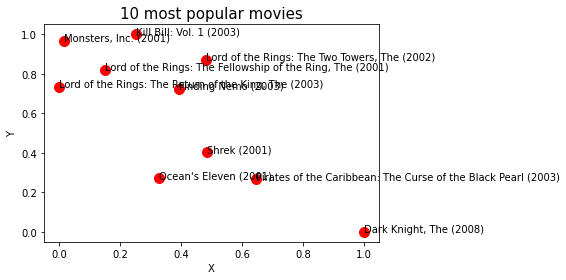

In [ ]:
arr_most_rating = {}

for movie in user_data['Movie ID']:
  if movie in arr_most_rating:
    arr_most_rating[movie] += 1
  else:
    arr_most_rating[movie] = 1

ten_highest_ratings = dict(sorted(arr_most_rating.items(), key = itemgetter(1), reverse = True)[:10])

print(ten_highest_ratings)


highest_movies_from_V = []

for key in ten_highest_ratings:
  key = int(key)
  highest_movies_from_V.append(np.transpose(V_app)[key])

Y_of_highest = np.dot(np.transpose(U_app), np.transpose(highest_movies_from_V))
new_arr = []
for i in range(len(np.transpose(Y_of_highest))):
  row = Y_of_highest[i]
  new_arr.append(np.mean(row))

print(new_arr)

X = []
y = []
for row in highest_movies_from_V:
  X.append(row[0])
  y.append(row[1])
y = (y - np.min(y)) / (np.max(y) - np.min(y))
X = (X - np.min(X)) / (np.max(X) - np.min(X))
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,y,s=100,color="red")
plt.title("10 most popular movies",fontsize=15)
annotations = ['Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Lord of the Rings: The Two Towers, The (2002)', 'Lord of the Rings: The Return of the King, The (2003)', 'Shrek (2001)', 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'Dark Knight, The (2008)', 'Finding Nemo (2003)', 'Kill Bill: Vol. 1 (2003)', 'Monsters, Inc. (2001)', "Ocean's Eleven (2001)"]
for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], y[i]))

plt.show()



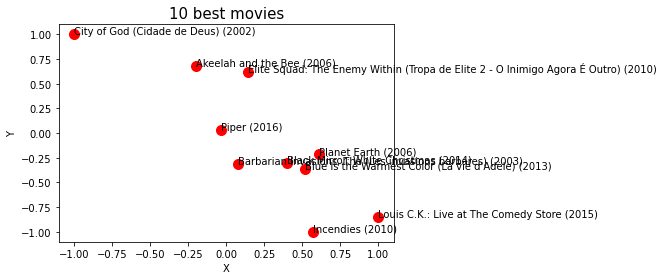

In [ ]:
arr_most_rating = {}
arr_sum_rating = {}

for i in range(len(user_data['Movie ID'])):
  movie = user_data['Movie ID'][i]
  rating = user_data['Rating'][i]
  if movie in arr_most_rating:
    arr_most_rating[movie] += 1
    arr_sum_rating[movie] += float(rating)
  else:
    arr_most_rating[movie] = 1
    arr_sum_rating[movie] = float(rating)

avg_rating = {}
for key in arr_most_rating:
  num_occ = arr_most_rating[key]
  sum_of_ratings = arr_sum_rating[key]
  avg = sum_of_ratings/num_occ
  avg_rating[key]= avg


ten_highest_ratings = dict(sorted(avg_rating.items(), key = itemgetter(1), reverse = True)[:10])

highest_average_V = []
highest_average_V_names = []

for key in ten_highest_ratings:
  highest_average_V.append(np.transpose(V_app)[int(key)])
  highest_average_V_names.append(movie_data['Movie Title'][int(key)])

X = []
y = []
for row in highest_average_V:
  X.append(row[0])
  y.append(row[1])
y = 2*(y - np.min(y)) / (np.max(y) - np.min(y))-1
X = 2*(X - np.min(X)) / (np.max(X) - np.min(X))-1
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(y,X,s=100,color="red")
plt.title("10 best movies",fontsize=15)
annotations = highest_average_V_names
for i, label in enumerate(annotations):
    plt.annotate(label, (y[i], X[i]))

plt.show()


['Casino Royale (2006)' 'Skyfall (2012)' 'Cinderella (2015)' 'Saw (2004)'
 'Get Out (2017)' 'Pride & Prejudice (2005)' 'Fifty Shades of Grey (2015)'
 'Insidious (2010)' 'Iron Man 2 (2010)' 'Iron Man (2008)']


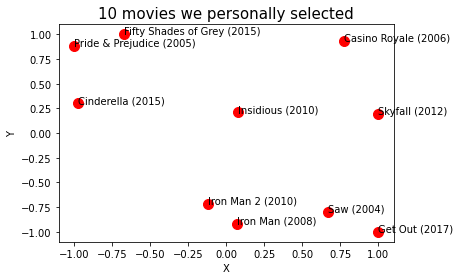

In [ ]:

movie_ids_of_super = [676, 677, 661, 438, 1031, 487, 1119, 253, 1196, 228]
names_of_movies = []

for i in movie_ids_of_super:
  names_of_movies.append(movie_data['Movie Title'][i])



v_super = []

for key in movie_ids_of_super:
  v_super.append(np.transpose(V_app)[int(key)])
X = []
y = []

for row in v_super:
  X.append(row[0])
  y.append(row[1])

y = 2*(y - np.min(y)) / (np.max(y) - np.min(y))-1
X = 2*(X - np.min(X)) / (np.max(X) - np.min(X))-1
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,y,s=100,color="red")
plt.title("10 movies we personally selected",fontsize=15)
annotations = highest_average_V_names
for i, label in enumerate((names_of_movies)):
    plt.annotate(label, (X[i], y[i]))
print(np.flipud(names_of_movies))

plt.show()



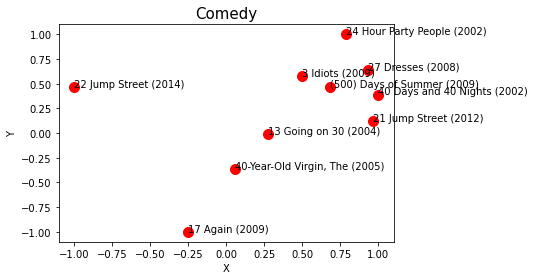

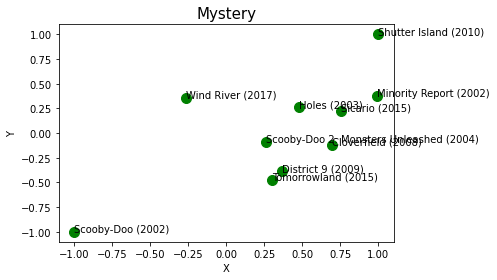

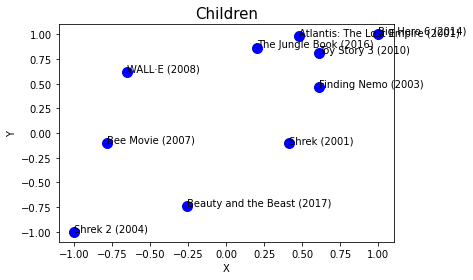

In [ ]:
# 1094 rogue one
movie_ids_of_mystery = [1130, 1131, 1177, 586, 265, 344, 877, 1178, 1354, 1460]
movie_ids_of_children = [445, 150, 137, 97, 1319, 135, 1417, 1360, 1173, 1174]
movie_ids_of_comedy = []

movie_names_of_mystery = []
movie_names_of_children = []
movie_names_of_comedy = []


for i in range(len(movie_data['Movie ID'])):
  if movie_data['Comedy'][i] != '0' and len(movie_ids_of_comedy) < 10:
    movie_names_of_comedy.append(movie_data['Movie Title'][i])
    movie_ids_of_comedy.append(int(movie_data['Movie ID'][i]))

for i in movie_ids_of_children:
  movie_names_of_children.append(movie_data['Movie Title'][i])
for i in movie_ids_of_mystery:
  movie_names_of_mystery.append(movie_data['Movie Title'][i])


v_mystery = []
v_children = []
v_comedy = []


for id in movie_ids_of_mystery:
  v_mystery.append(np.transpose(V_app)[int(id)])
for id in movie_ids_of_children:
  v_children.append(np.transpose(V_app)[int(id)])
for id in movie_ids_of_comedy:
  v_comedy.append(np.transpose(V_app)[int(id)])


for v_tup in [('comedy', v_comedy,movie_names_of_comedy), ('mystery', v_mystery,movie_names_of_mystery), ('children', v_children,movie_names_of_children)]:
  genre = v_tup[0]
  names_of_movies = v_tup[2]
  v_supe = v_tup[1]
  X = []
  y = []

  for row in v_supe:
    y.append(row[1])
    X.append(row[0])
  y = 2*(y - np.min(y)) / (np.max(y) - np.min(y))-1
  X = 2*(X - np.min(X)) / (np.max(X) - np.min(X))-1
  plt.xlabel("X")
  plt.ylabel("Y")

  if genre=='comedy':
    plt.title("Comedy",fontsize=15)
    plt.scatter(X,y,s=100,color="red")
  elif genre=='mystery':
    plt.title("Mystery",fontsize=15)
    plt.scatter(X,y,s=100,color="green")
  else:
    plt.title("Children",fontsize=15)
    plt.scatter(X,y,s=100,color="blue")


  for i, label in enumerate((names_of_movies)):
    plt.annotate(label, (X[i], y[i]))

  annotations = highest_average_V_names

  plt.show()



